<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [2]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(url)


#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [3]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


### The following describes the dataset variables:

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per \$10,000
- PTRATIO - pupil-teacher ratio by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in \$1000's



### Visualizations
For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

- For the "Median value of owner-occupied homes" provide a boxplot
- Provide a  bar plot for the Charles river variable
- Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
- Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
- Create a histogram for the pupil to teacher ratio variable

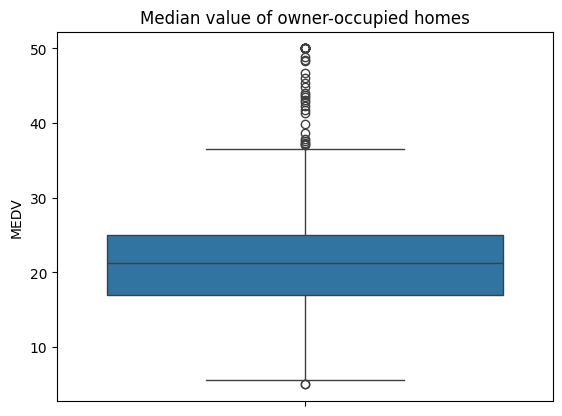

In [6]:
ax = sns.boxplot(y='MEDV', data=boston_df).set_title('Median value of owner-occupied homes')

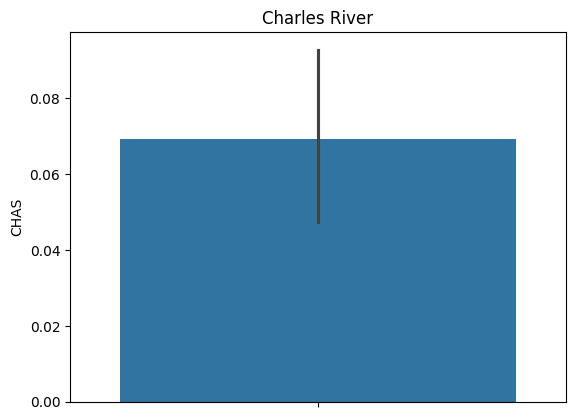

In [9]:
ax = sns.barplot(y='CHAS', data=boston_df).set_title('Charles River')

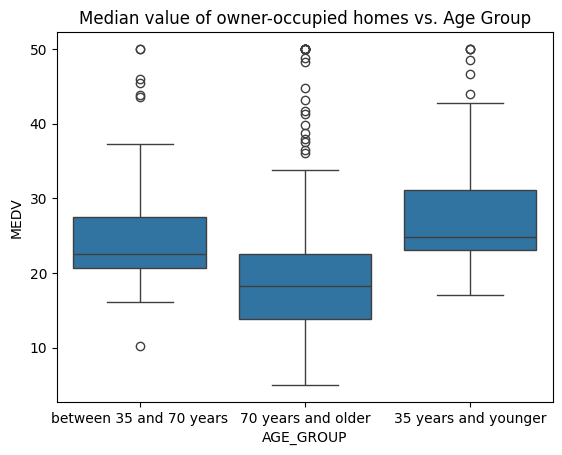

In [11]:

boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'AGE_GROUP'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >=70), 'AGE_GROUP'] = '70 years and older'

ax = sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df).set_title('Median value of owner-occupied homes vs. Age Group')

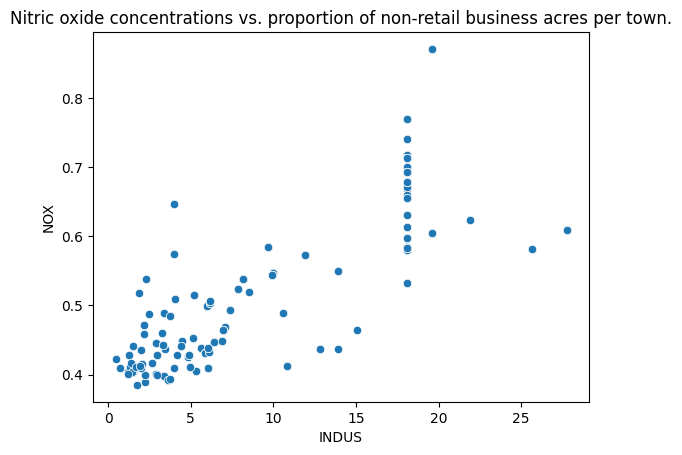

In [14]:
ax = sns.scatterplot(x='INDUS', y='NOX', 
                     data=boston_df).set_title('Nitric oxide concentrations vs. proportion of non-retail business acres per town.')

# A bit of a linear correlation

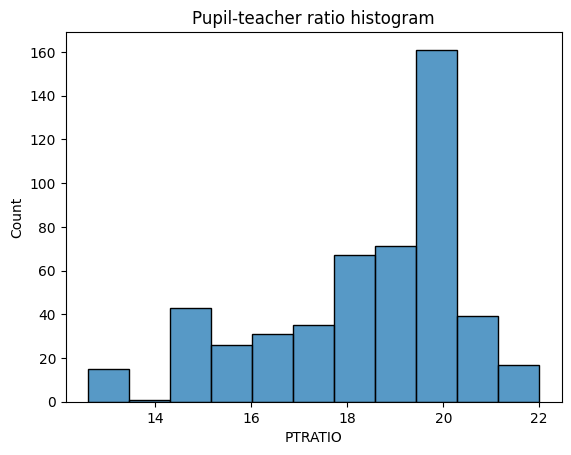

In [26]:
ax = sns.histplot(x='PTRATIO', data=boston_df, bins=11).set_title('Pupil-teacher ratio histogram')

### Tasks/Questions

- Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
- Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
- Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
- What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:
- State your hypothesis.
- Use α = 0.05
- Perform the test Statistics.
- State the conclusion from the test.

In [35]:
# Is there a significant difference in 
# median value of houses (MEDV) bounded by the Charles river or not? 
# (T-test for independent samples); null hypothesis = there is no difference

p1 = boston_df[boston_df.CHAS > 0].MEDV.values
p2 = boston_df[boston_df.CHAS == 0].MEDV.values
levene = scipy.stats.levene(p1, p2, center='mean')
equal_var = bool(levene.pvalue >= 0.05)
scipy.stats.ttest_ind(p1, p2, equal_var=equal_var)

# p-value < 0.05, we reject null hypothesis -> yes there is a difference in MEDV whether bounded by Charles River

TtestResult(statistic=np.float64(3.113291312794837), pvalue=np.float64(0.0035671700981375174), df=np.float64(36.876408797611994))

In [40]:
# Is there a difference in 
# median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? 
# (ANOVA); null hypothesis = there is no difference

p1 = boston_df[boston_df.AGE_GROUP == '35 years and younger'].MEDV.values
p2 = boston_df[boston_df.AGE_GROUP == 'between 35 and 70 years'].MEDV.values
p3 = boston_df[boston_df.AGE_GROUP == '70 years and older'].MEDV.values

levene = scipy.stats.levene(p1, p2, p3, center='mean')
equal_var = bool(levene.pvalue >= 0.05)
scipy.stats.f_oneway(p1, p2, p3)

# p-value < 0.05, we reject null hypothesis 
# -> yes there is a difference in MEDV for each proportion of owner occupied units prior to 1940

F_onewayResult(statistic=np.float64(36.40764999196599), pvalue=np.float64(1.7105011022702984e-15))

In [42]:
# Can we conclude that there is no relationship between 
# Nitric oxide concentrations and proportion of non-retail business acres per town? 
# (Pearson Correlation); null hypothesis = there is no association

scipy.stats.pearsonr(boston_df.NOX, boston_df.INDUS)
# p-value < 0.05, we reject null hypothesis 
# -> yes there is an association in Nitric oxide concentrations and proportion of non-retail business acres per town

PearsonRResult(statistic=np.float64(0.763651446920915), pvalue=np.float64(7.913361061241171e-98))

In [43]:
# What is the impact of an additional weighted distance 
# to the five Boston employment centres on the median value of owner occupied homes? 
# (Regression analysis)

## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 08 Mar 2025   Prob (F-statistic):           1.21e-08
Time:                        16:35:03   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# impact: additional distance associated with higher MEDV; on average +1.1